In [72]:
import pandas as pd

In [73]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving dataframe_exercicio_modulo_9.csv to dataframe_exercicio_modulo_9 (2).csv


In [74]:
import io
df = pd.read_csv(io.BytesIO(uploaded['dataframe_exercicio_modulo_9.csv']))
df.head()

,sex,age,famsize,Pstatus,traveltime,studytime,schoolsup,famsup,paid,activities,internet,romantic,famrel,freetime,goout,absences,G3
0,F,18,GT3,A,2,2,yes,no,no,no,no,no,4,3,4,6,6
1,F,17,GT3,T,1,2,no,yes,no,no,yes,no,5,3,3,4,6
2,F,15,LE3,T,1,2,yes,no,yes,no,yes,no,4,3,2,10,10
3,F,15,GT3,T,1,3,no,yes,yes,yes,yes,yes,3,2,2,2,15
4,F,16,GT3,T,1,2,no,yes,yes,no,no,no,4,3,2,4,10


Atributos do dataset:
    
    1- 'sex': sexo
    
    2- 'age': idade
    
    3- 'famsize': tamanho da família; LE3 - famílias com no máximo 3 pessoas, GT3 caso contrário
    
    4- 'Pstatus': status de habitação com os pais; T - mora junto com os pais, A - mora separado;
    
    5- 'traveltime': tempo de viagem entre escola e casa; 
        1 - <15 min., 2 - 15 a 30 min., 3 - 30 min. a 1 hora, or 4 - >1 hora
        
    6- 'studytime': tempo de estudo semanal; 1 - <2 horas, 2 - 2 a 5 horas, 3 - 5 a 10 horas, ou 4 - >10 horas
    
    7- 'schoolsup': suporte educacional extra escola
    
    8- 'famsup': suporte educacional da família
    
    9- 'paid': pagou aulas particulares por fora 
    
    10- 'activities': atividades extra-curriculares
    
    11- 'internet': acesso a internet em casa
    
    12- 'romantic': se está num relacionamento
    
    13- 'famrel': qualidade das relações familiares; 1 - muito ruim a 5 - muito boa
    
    14- 'freetime': tempo livre após escola; 1 - muito pouco até 5 - muito
    
    15- 'goout': relaciona-se com amigos; 1 - muito pouco até 5 - muito
    
    16- 'absences': quantidade de faltas na escola
    
    17- 'G3': nota média final no ensino médio
    
<br>

No dataset acima, faça uma __análise exploratória__ geral, bem como __pré-processamentos__ nas variáveis.

Considere a variável __'G3'__ como a __variável target__ do problema - contexto de __regressão.__

Teste __diferentes modelos de regressão__ a fim de explicar a variável target. Use a metodologia da __validação cruzada__ e o __coeficiente de determinação ($R^{2}$)__ como métrica de performance.

Plote __gráficos__ personalizados com os resultados.

Análise exploratória

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

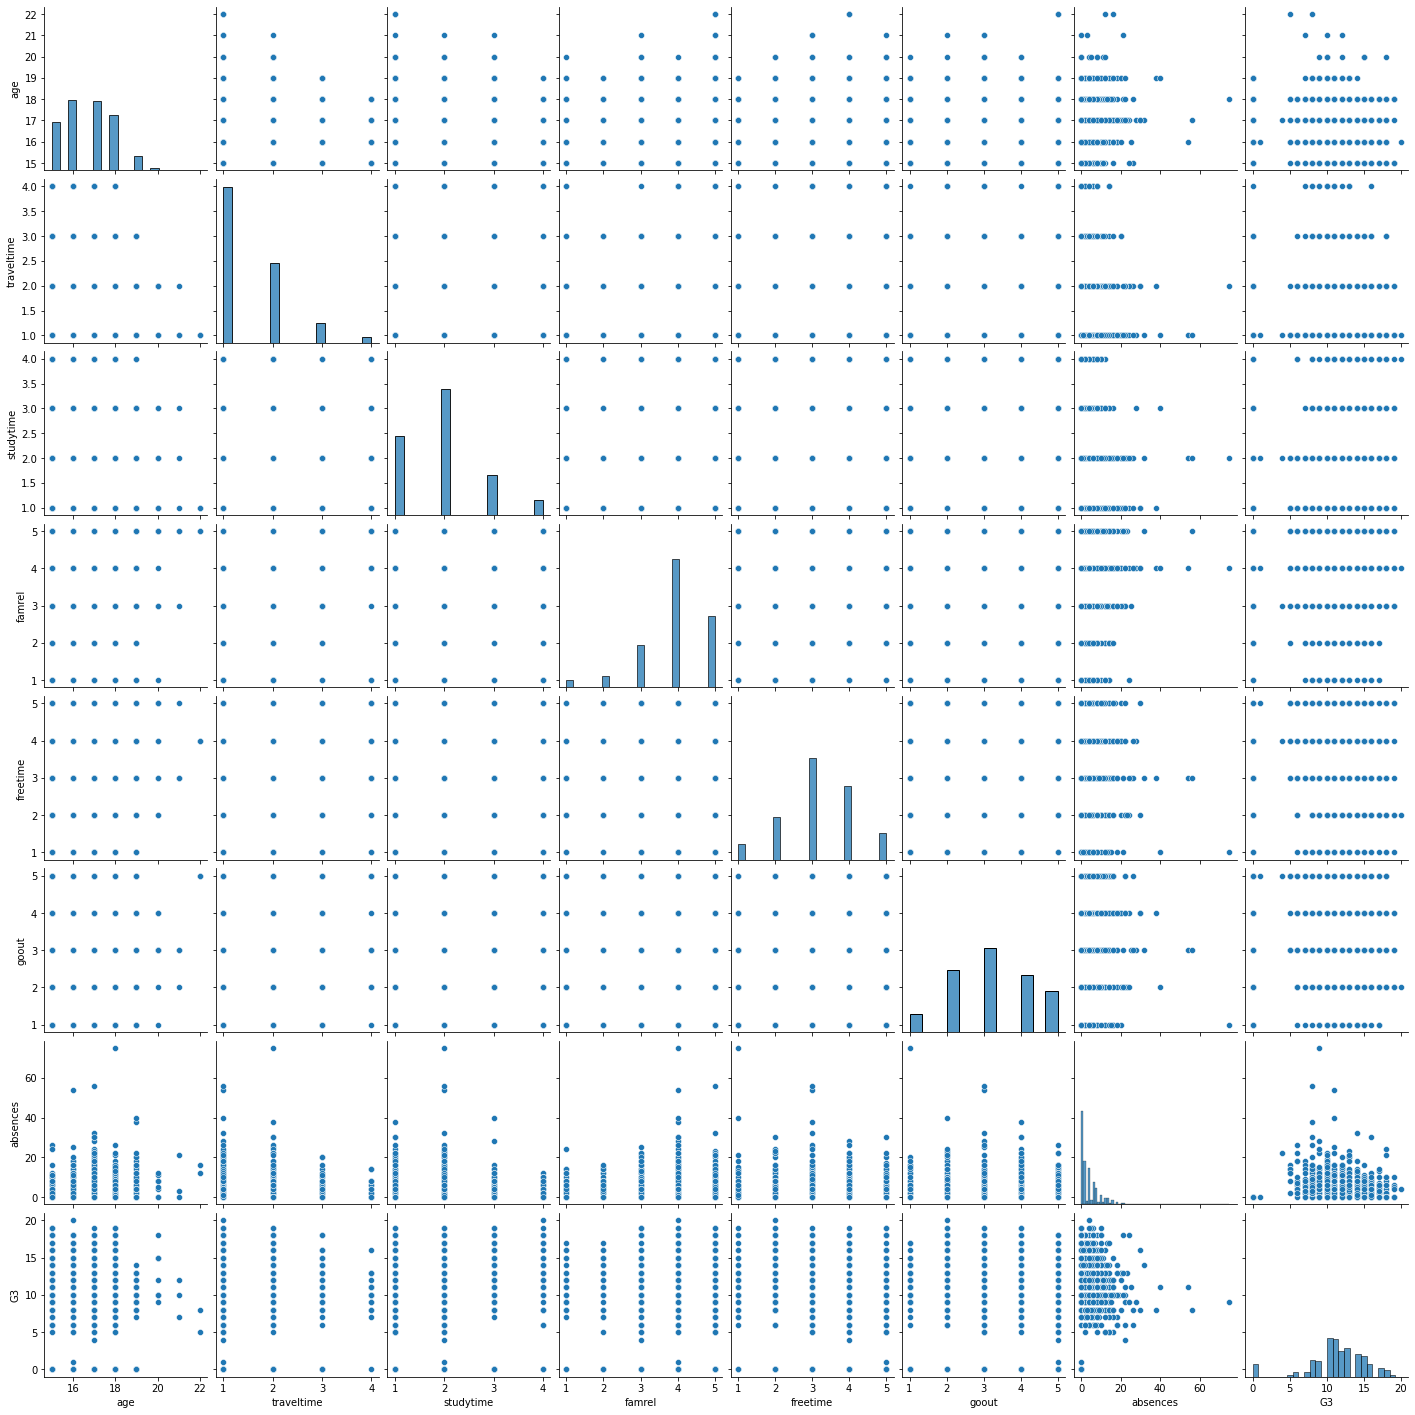

In [76]:
sns.pairplot(df)

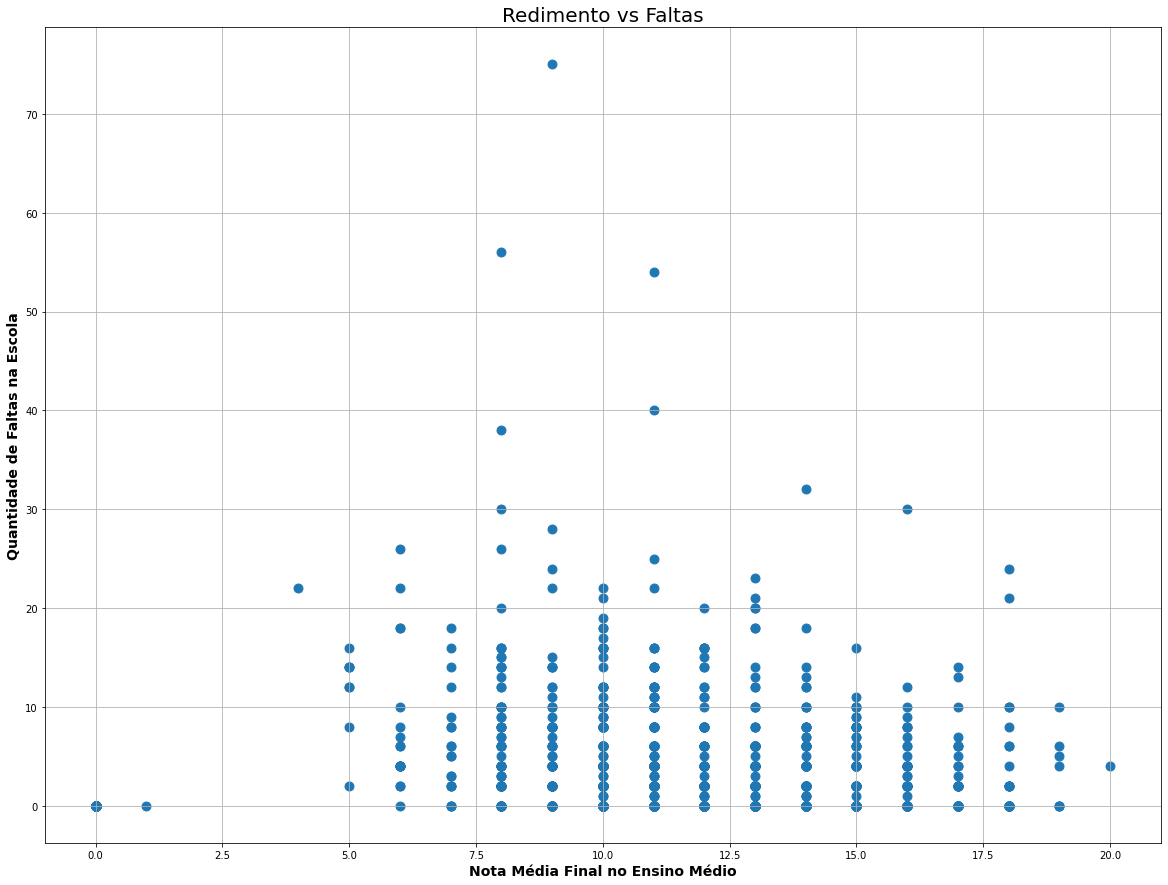

In [77]:
plt.figure(figsize=[20,15])
plt.scatter(df.G3, df.absences, s = 80)
plt.title("Redimento vs Faltas", fontsize = 20)
plt.xlabel("Nota Média Final no Ensino Médio", fontsize = 14, fontweight = 'bold')
plt.ylabel("Quantidade de Faltas na Escola", fontsize = 14, fontweight = 'bold')
plt.grid()
plt.show()

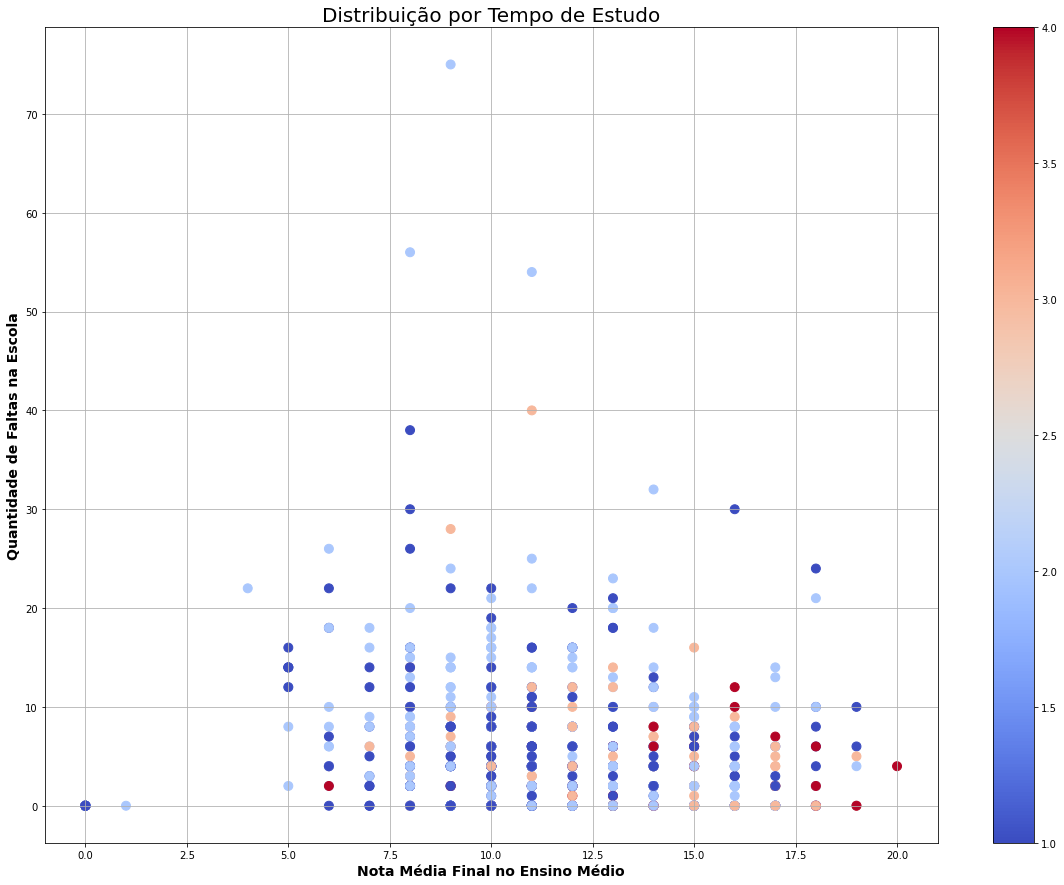

In [78]:
plt.figure(figsize=[20,15])
plt.scatter(df.G3, df.absences, s = 80, c = df.studytime, cmap = plt.cm.coolwarm)
plt.title("Distribuição por Tempo de Estudo", fontsize = 20)
plt.xlabel("Nota Média Final no Ensino Médio", fontsize = 14, fontweight = 'bold')
plt.ylabel("Quantidade de Faltas na Escola", fontsize = 14, fontweight = 'bold')
plt.colorbar()
plt.grid()
plt.show()

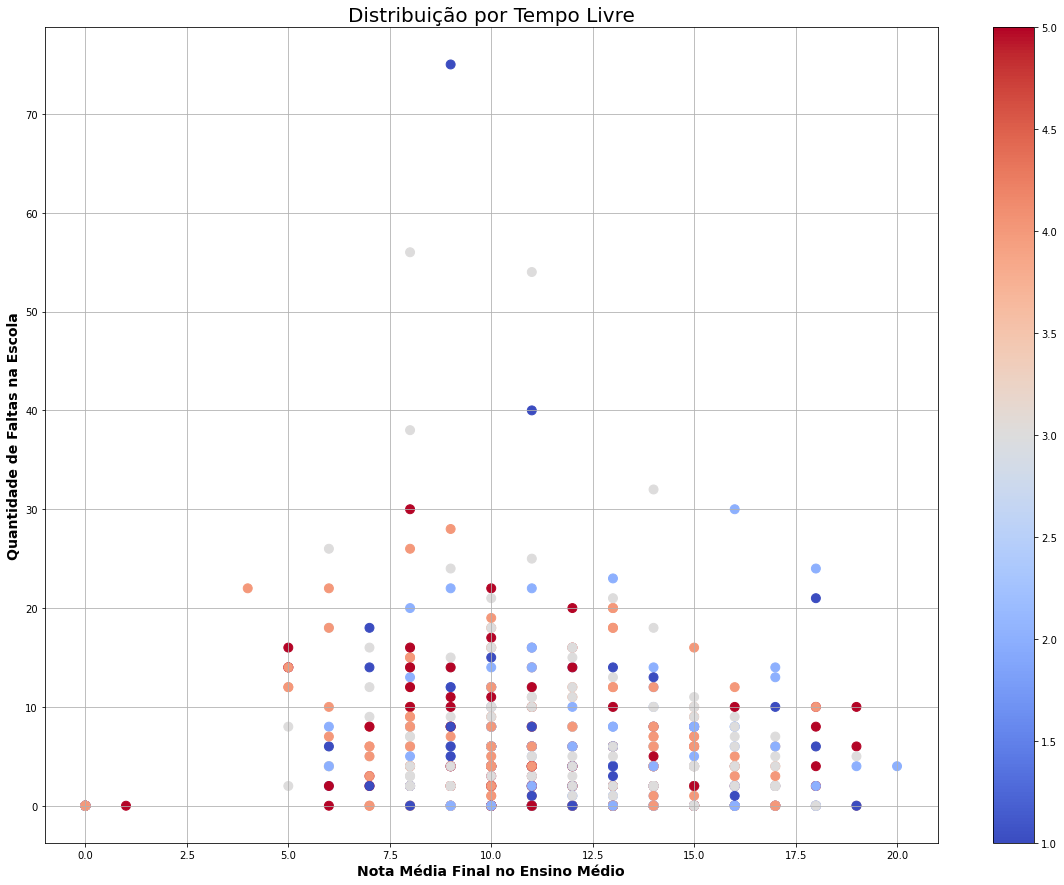

In [79]:
plt.figure(figsize=[20,15])
plt.scatter(df.G3, df.absences, s = 80, c = df.freetime, cmap = plt.cm.coolwarm)
plt.title("Distribuição por Tempo Livre", fontsize = 20)
plt.xlabel("Nota Média Final no Ensino Médio", fontsize = 14, fontweight = 'bold')
plt.ylabel("Quantidade de Faltas na Escola", fontsize = 14, fontweight = 'bold')
plt.colorbar()
plt.grid()
plt.show()

__correlação__ das variáveis explicativas com a variável target:

In [80]:
df.corr()['G3']

age          -0.125282
traveltime   -0.102627
studytime     0.161629
famrel        0.054461
freetime     -0.064890
goout        -0.097877
absences     -0.045671
G3            1.000000
Name: G3, dtype: float64

Vemos que a varíavel studytime possui uma alta correlação com a variável target, perto de 0.16.

Preparação dos dados para os modelos de aprendizado de máquina

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
dftrain, dftest = train_test_split(df, test_size = 0.25, random_state = 0)
print(df.shape)
print(dftrain.shape)
print(dftest.shape)

(1044, 17)
(783, 17)
(261, 17)


Engenharia de variáveis


> Qual é o tempo médio de estudo por idade?


> Qual a relação entre tamanho da família e pagar aulas particulares por fora?



> Qual a relação entre atividades extra-curriculares e se está em um relacionamento?







In [83]:
df.head()

,sex,age,famsize,Pstatus,traveltime,studytime,schoolsup,famsup,paid,activities,internet,romantic,famrel,freetime,goout,absences,G3
0,F,18,GT3,A,2,2,yes,no,no,no,no,no,4,3,4,6,6
1,F,17,GT3,T,1,2,no,yes,no,no,yes,no,5,3,3,4,6
2,F,15,LE3,T,1,2,yes,no,yes,no,yes,no,4,3,2,10,10
3,F,15,GT3,T,1,3,no,yes,yes,yes,yes,yes,3,2,2,2,15
4,F,16,GT3,T,1,2,no,yes,yes,no,no,no,4,3,2,4,10


Tratamento de variáveis categóricas

1- Para cada valor categórico, associar a um valor numérico;

2- Aplicar a técnica OHE (ONE HOT ENCODING) nas categorias;

In [84]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import numpy as np

In [104]:
def preprocessamento_completo(df, dataset_de_treino = True, cat_encoder = None, std_scaler = None):

    dff = df.copy()

    #criação de novas variáveis
    df["estudo_por_idade"] = df["studytime"]/df["age"]
    
    variaveis_para_normalizar = ['age',
                                 'traveltime',
                                'studytime',
                                 'famrel',
                                 'freetime',
                                 'goout',
                                 'absences']

    if dataset_de_treino:  
        
        #OHE
        encoder = OneHotEncoder()
        df_famsize_OHE = encoder.fit_transform(dff[['famsize']]).toarray()
        df_Pstatus_OHE = encoder.fit_transform(dff[['Pstatus']]).toarray()
        df_schoolsup_OHE = encoder.fit_transform(dff[['schoolsup']]).toarray()
        df_famsup_OHE = encoder.fit_transform(dff[['famsup']]).toarray()
        df_paid_OHE = encoder.fit_transform(dff[['paid']]).toarray()
        df_activities_OHE = encoder.fit_transform(dff[['activities']]).toarray()
        df_internet_OHE = encoder.fit_transform(dff[['internet']]).toarray()
        df_romantic_OHE = encoder.fit_transform(dff[['romantic']]).toarray()

        #normalização
        sc = StandardScaler()
        variaveis_norm = sc.fit_transform(dff[variaveis_para_normalizar])
        
        X, y =  np.c_[df_famsize_OHE, df_Pstatus_OHE, df_schoolsup_OHE, df_famsup_OHE, df_paid_OHE, df_activities_OHE, df_internet_OHE, df_romantic_OHE, variaveis_norm], dff.G3.values
        return X, y, encoder, sc
    
    else:
        #OHE
        df_famsize_OHE = cat_encoder.fit_transform(dff[['famsize']]).toarray()
        df_Pstatus_OHE = cat_encoder.fit_transform(dff[['Pstatus']]).toarray()
        df_schoolsup_OHE = cat_encoder.fit_transform(dff[['schoolsup']]).toarray()
        df_famsup_OHE = cat_encoder.fit_transform(dff[['famsup']]).toarray()
        df_paid_OHE = cat_encoder.fit_transform(dff[['paid']]).toarray()
        df_activities_OHE = cat_encoder.fit_transform(dff[['activities']]).toarray()
        df_internet_OHE = cat_encoder.fit_transform(dff[['internet']]).toarray()
        df_romantic_OHE = cat_encoder.fit_transform(dff[['romantic']]).toarray()
        
        #normalização
        variaveis_norm = std_scaler.transform(dff[variaveis_para_normalizar]) 
        
        X, y =  np.c_[df_famsize_OHE, df_Pstatus_OHE, df_schoolsup_OHE, df_famsup_OHE, df_paid_OHE, df_activities_OHE, df_internet_OHE, df_romantic_OHE, variaveis_norm], dff.G3.values
        return X, y

In [86]:
Xtrain, ytrain, encoder_train, scaler_train  = preprocessamento_completo(df = dftrain, 
                                                                         dataset_de_treino = True, 
                                                                         cat_encoder = None, 
                                                                         std_scaler = None)

In [87]:
Xtrain.shape, ytrain.shape, dftrain.shape

((783, 23), (783,), (783, 18))

Veja que a dimensão de Xtrain e dftrain estão diferentes!

De fato, foram criadas variáveis novas dentro da função acima, bem como foi aplicado one-hot-encoding, o que também aumenta a dimensão do dataset.

A função acima, além de retornar os arrays Xtrain, ytrain já devidamente preprocessados e prontos para serem consumidos pelos modelos de aprendizado de máquina, retornam os objetos encoder_train e scaler_train, que foram fitados com as informações advindas do dataset de treino - dftrain.

Abaixo, iremos aplicar as transformações no dataset de teste - dataset que iremos usar apenas no final do notebook, após a escolha do modelo de aprendizado de máquina final.

In [105]:
Xtest, ytest = preprocessamento_completo(df = dftest, 
                                         dataset_de_treino = False, 
                                         cat_encoder = encoder_train, 
                                         std_scaler = scaler_train)

In [107]:
Xtest.shape, ytest.shape, dftest.shape

((261, 23), (261,), (261, 18))

Aprendizado de máquina

In [108]:
#algoritmos
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

#metricas de performance
from sklearn.metrics import mean_squared_error, r2_score

In [109]:
def RMSE(ytrue, ypred):
    return np.sqrt(mean_squared_error(y_true = ytrue, y_pred = ypred))

Vamos começar por treinar o modelo de regressão linear nos dados e avaliar o RMSE e o R2 nos dados de treino:

In [110]:
lin_reg = LinearRegression()
lin_reg.fit(Xtrain, ytrain)

LinearRegression()

In [111]:
RMSE(ytrue = ytrain, ypred = lin_reg.predict(Xtrain))

3.8396859440806947

In [112]:
r2_score(y_true=ytrain, y_pred=lin_reg.predict(Xtrain))

0.09787950824513836

Agora, vamos testar algumas versões do KNN, considerando diferentes números de vizinhos.

Iremos também testar algumas versões das árvores de decisão - para fins de comparação.

Como veremos abaixo, o scikit-learn facilita muito a usabilidade dos modelos, de modo que somos capazes de testar alguns modelos mesmo sem conhecer os detalhes de seu funcionamento! De quaquer forma, as árvores de decisão serão estudadas em mais detalhes nos próximos módulos.

Por agora, considere que essa classe de algoritmos - árvores de decisão - possuem vários hiperparâmetros a serem definidos. Iremos considerar um específico: max_depth, que seria a "profundidade da árvore".

In [113]:
num_vizinhos = [1, 2, 5, 10, 20, 50]

for n in num_vizinhos:
    knn = KNeighborsRegressor(n_neighbors = n)
    knn.fit(Xtrain, ytrain)
    
    preds = knn.predict(Xtrain)
    
    rmse_train = RMSE(ytrue = ytrain, ypred = preds)
    r2_train = r2_score(y_true = ytrain, y_pred = preds)
    
    print("K = " + str(n) + " | RMSE:" + str(np.round(rmse_train,2)) + " / R2: "+ str(np.round(r2_train, 2)))

K = 1 | RMSE:1.01 / R2: 0.94
K = 2 | RMSE:2.67 / R2: 0.56
K = 5 | RMSE:3.35 / R2: 0.31
K = 10 | RMSE:3.58 / R2: 0.22
K = 20 | RMSE:3.77 / R2: 0.13
K = 50 | RMSE:3.86 / R2: 0.09


In [114]:
max_profundidades = [1, 5, 10, 100]

for m in max_profundidades:
    dt = DecisionTreeRegressor(max_depth = m)
    dt.fit(Xtrain, ytrain)
    
    preds = dt.predict(Xtrain)
    
    rmse_train = RMSE(ytrue = ytrain, ypred = preds)
    r2_train = r2_score(y_true = ytrain, y_pred = preds)
    
    print("Profundidade da árvore = " + str(m) + " | RMSE:" + str(np.round(rmse_train,2)) + " / R2: "+ str(np.round(r2_train, 2)))

Profundidade da árvore = 1 | RMSE:4.0 / R2: 0.02
Profundidade da árvore = 5 | RMSE:3.62 / R2: 0.2
Profundidade da árvore = 10 | RMSE:2.34 / R2: 0.67
Profundidade da árvore = 100 | RMSE:0.72 / R2: 0.97


Vemos que os modelos KNN(K=1) e DecTree(max_depth = 100) ambos tiveram o melhor R2 possível (de 0.94 e 0.97) e os menores RMSE's possíveis (de 1.01 e de 0.72).

Validação cruzada, ou, também muito conhecida com o nome em inglês, cross-validation. O mecanismo de validação cruzada consiste de dividir o dataset de treino em K partes (ou folds) de mesmo tamanho. Aqui, o valor de K deve ser fixado de antemão. Tendo dividido o dataset nas K partes, iremos proceder da seguinte forma: fixamos 1 parte (parte de validação) e usamos as outras todas para treinar o modelo; iremos avaliá-lo nesta parte. Na sequência, escolhemos outra parte para validação e treinamos novamente o modelo nas outras partes restantes. Seguimos assim até esgotarmos todas as partes de validação.

In [115]:
from sklearn.model_selection import cross_val_score

Essa função - cross_val_score - recebe os parâmetros:

1- estimador (modelo) a ser usado;
2- variaveis explicativas;
3- variável target;
4- parâmetro cv: quantidade de folds que a validação cruzada irá fazer;
5- métrica a ser avaliada.
Abaixo, aplicamos a validação cruzada para a regressão linear em nosso problema, considerando 5 folds e o R2 como a métrica de performance a ser medida.

In [116]:
cv_lin_reg = cross_val_score(estimator = LinearRegression(), 
                             X = Xtrain, 
                             y = ytrain, 
                             cv = 5, 
                             scoring = 'r2')
print(cv_lin_reg)
print('media: ', cv_lin_reg.mean())
print('desvio padrão: ', cv_lin_reg.std())

[0.03680756 0.09261455 0.07253513 0.01396966 0.0747805 ]
media:  0.05814147811976356
desvio padrão:  0.028561207257165863


Acima, temos o resultado do R2 médio para os 5 folds de validação no modelo de regressão linear: 0.058

Lembrando que o R2 em treino foi de 0.94 e 0.97, vemos que o modelo de regressão linear, não teve uma ótima performance no dataset e está overfitando, uma vez que as métricas em treino e cross-validação não estão se mantendo.


In [117]:
def cross_validation_R2_results(modelo, nome_modelo, X, y, num_folds):
    cv_results = cross_val_score(estimator = modelo, 
                                 X = Xtrain, 
                                 y = ytrain, 
                                 cv = num_folds, 
                                 scoring = 'r2') 
    modelo.fit(Xtrain, ytrain)
    r2_train = r2_score(y_true=ytrain, y_pred=modelo.predict(Xtrain))
    plt.figure(figsize=[8,6])
    plt.scatter(range(1, 1+num_folds), cv_results, c = 'blue', s = 100)
    plt.plot(range(1, 1+num_folds), cv_results, c = 'blue', lw = 2, label = 'R2 Fold')
    plt.xticks(range(1, 1+num_folds))
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.plot(range(1, 1+num_folds), [cv_results.mean()] * num_folds, c = 'red', lw = 2, label = 'R2 Cross-val Médio')
    
    
    plt.plot(range(1, 1+num_folds), [cv_results.mean() + cv_results.std()] * num_folds, '--',
             c = 'gray', lw = 2, label = '+1 desv. padrão margem')
    plt.plot(range(1, 1+num_folds), [cv_results.mean() - cv_results.std()] * num_folds, '--',
             c = 'gray', lw = 2, label = '-1 desv. padrão margem')
    
    plt.plot(range(1, 1+num_folds), [r2_train] * num_folds, '--' ,c = 'black', lw = 3, label = 'R2 Treino')
    plt.legend(fontsize = 10, bbox_to_anchor = [1.4,1.])
    plt.ylim([0,1.05])
    plt.grid()
    plt.ylabel("R2 Score", fontsize = 14, fontweight = 'bold')
    plt.xlabel("Folds", fontsize = 14, fontweight = 'bold')
    plt.title(nome_modelo + " | R2 TREINO/VAL: "+ str(np.round(r2_train,2)) +" / "+ str(np.round(cv_results.mean(),2)),
              fontsize = 14, fontweight = 'bold')
    plt.show()

Aplicando a função acima nos modelos que estamos considerando:

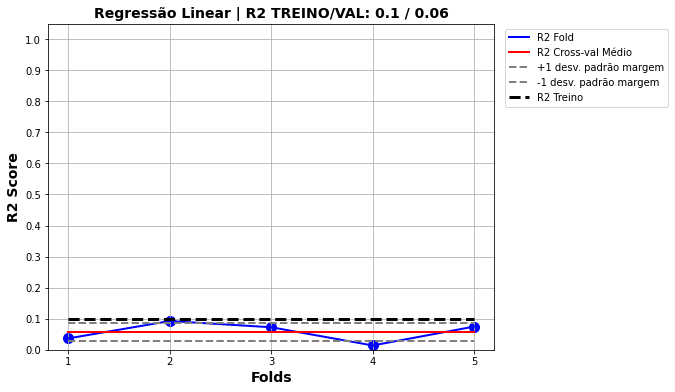

In [118]:
cross_validation_R2_results(modelo = LinearRegression(),
                           nome_modelo = 'Regressão Linear',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

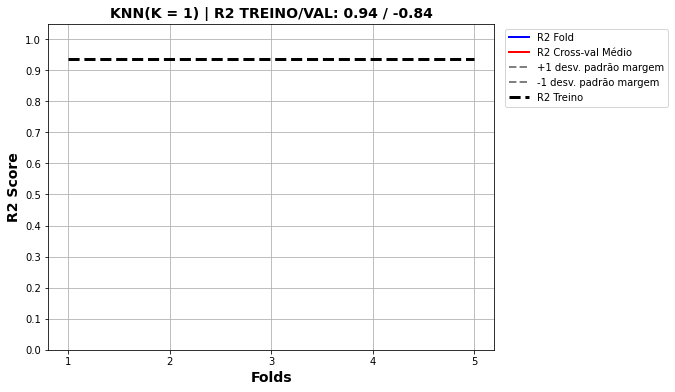

In [119]:
cross_validation_R2_results(modelo = KNeighborsRegressor(n_neighbors = 1),
                           nome_modelo = 'KNN(K = 1)',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

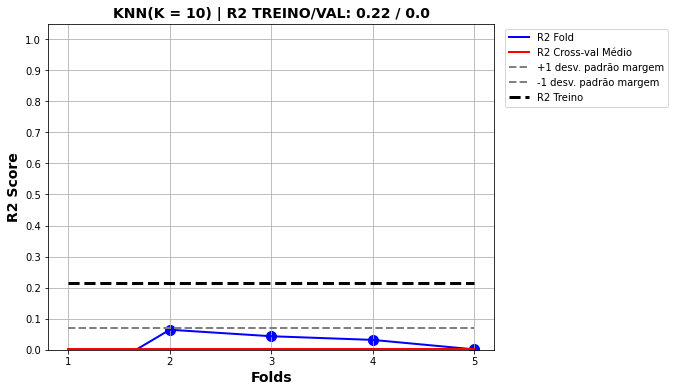

In [120]:
cross_validation_R2_results(modelo = KNeighborsRegressor(n_neighbors = 10),
                           nome_modelo = 'KNN(K = 10)',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

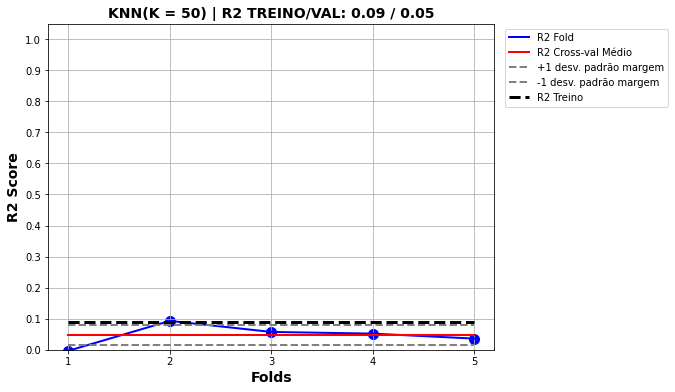

In [121]:
cross_validation_R2_results(modelo = KNeighborsRegressor(n_neighbors = 50),
                           nome_modelo = 'KNN(K = 50)',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

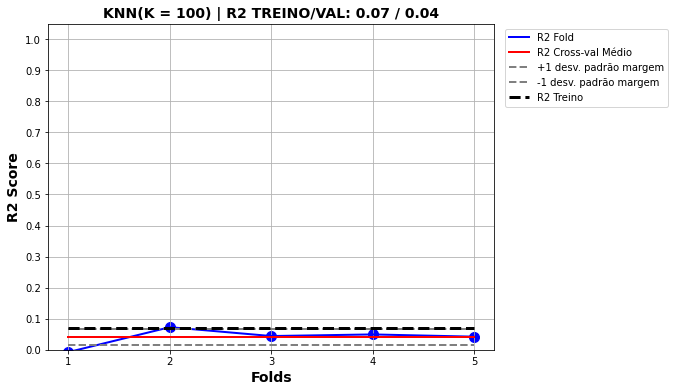

In [135]:
cross_validation_R2_results(modelo = KNeighborsRegressor(n_neighbors = 100),
                           nome_modelo = 'KNN(K = 100)',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

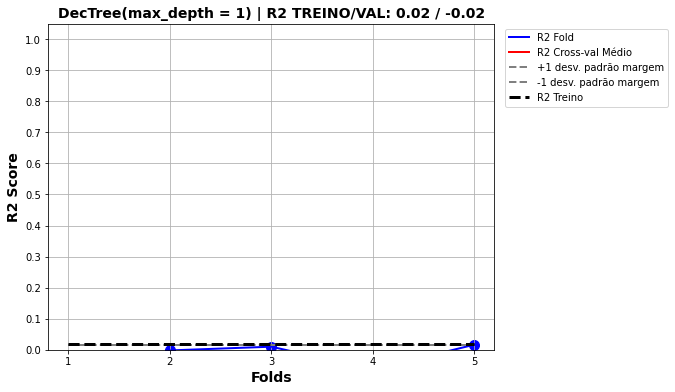

In [122]:
cross_validation_R2_results(modelo = DecisionTreeRegressor(max_depth = 1),
                           nome_modelo = 'DecTree(max_depth = 1)',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

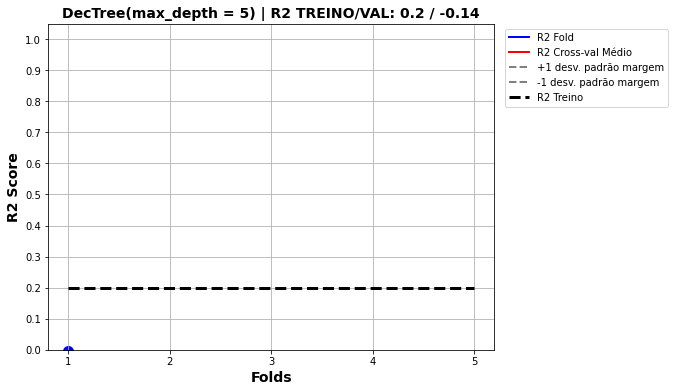

In [123]:
cross_validation_R2_results(modelo = DecisionTreeRegressor(max_depth = 5),
                           nome_modelo = 'DecTree(max_depth = 5)',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

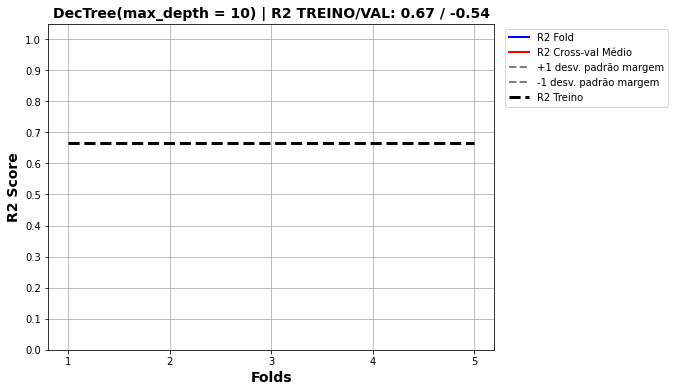

In [125]:
cross_validation_R2_results(modelo = DecisionTreeRegressor(max_depth = 10),
                           nome_modelo = 'DecTree(max_depth = 10)',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

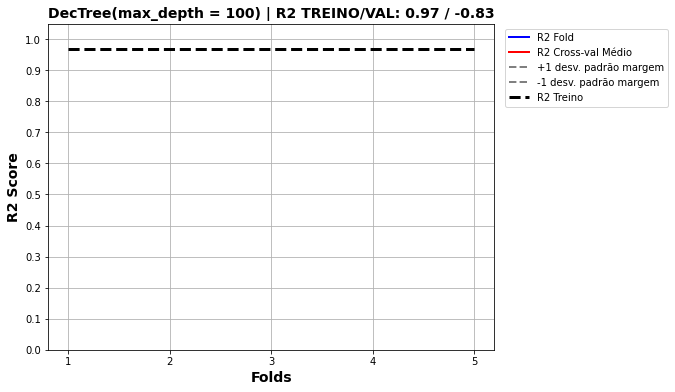

In [127]:
cross_validation_R2_results(modelo = DecisionTreeRegressor(max_depth = 100),
                           nome_modelo = 'DecTree(max_depth = 100)',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

Diante dos resultados acima, vemos que algumas instâncias do KNN e das árvores de decisão estão realmente overfitando os dados de treino.

Além disso, vemos que a regressão linear obteve uma performance ok, mas sendo superada pelo KNN com K = 100 vizinhos.

Desta forma, vamos considerar que nosso modelo final é o KNN(K=100).

Nesta etapa final, vamos treiná-la novamente, usando todo o conjunto de treinamento e finalmente iremos avaliar as métricas (R2) no conjunto de teste:

In [158]:
modelo_final = KNeighborsRegressor(n_neighbors = 100)
modelo_final.fit(Xtrain, ytrain)

KNeighborsRegressor(n_neighbors=100)

In [159]:
preds_modelo_final = modelo_final.predict(Xtest)

In [160]:
r2_score(y_true = ytest, y_pred = preds_modelo_final)

0.10626585668051058

In [161]:
rmse_teste_final = RMSE(ytrue = ytest, ypred = preds_modelo_final)
rmse_teste_final

3.073327224667926

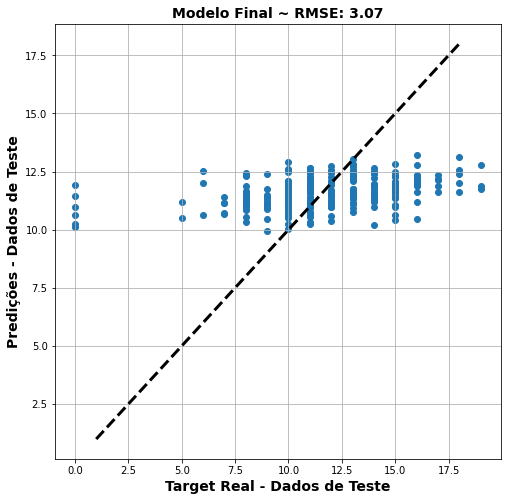

In [162]:
plt.figure(figsize=[8,8])
plt.title("Modelo Final ~ RMSE: " + str(np.round(rmse_teste_final,2)), fontweight = 'bold', fontsize = 14)
plt.scatter(ytest, preds_modelo_final)
plt.xlabel("Target Real - Dados de Teste", fontweight = 'bold', fontsize = 14)
plt.ylabel("Predições - Dados de Teste", fontweight = 'bold', fontsize = 14)
plt.grid()
range_line = int(np.maximum(max(ytest), max(preds_modelo_final)))
plt.plot(range(1, range_line), range(1, range_line), '--' ,c = 'black', lw = 3)
plt.show()